In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# notebook을 실행한 브라우저에서 바로 그림을 볼 수있게 해주는 명령어
# matplotlib 시각화 결과를 jupyter notebook에서 바로 확인하기 위한 코드 작성 
%matplotlib inline

# csv 파일 불러오기
# 파일 경로는 colab이용시 드라이브 경로, vsc이용시 로컬경로
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/google-app-pre.csv')

# 제대로 불러와졌는지 확인하고싶으면
print(data.shape) # 행, 열의 개수 확인 가능

data.head(50)

In [65]:
#with google
#True
AdTrue = data[(data["Ad Supported"]== True)].sort_values('Maximum Installs', ascending = False).reset_index(drop =False)
true_average_install = AdTrue["Maximum Installs"].sum()/174011 #약1492648개
true_average_rating = AdTrue["Rating"].sum()/174011 #약4.0점
true_category = AdTrue.groupby('Category').count().sort_values('Category', ascending = False).reset_index(drop =False).drop(['Unnamed: 0', 'App Name',	'App Id',	'Rating',	'Maximum Installs',	'Free',	'Price',	'Currency',	'Released',	'Last Updated',	'Content Rating',	'Ad Supported',	'In App Purchases',	'Editors Choice'], axis=1).sort_values(by='index', ascending = False).reset_index(drop =True) #Game, Entertainment, Personalization, Education, Tools, Music&Audio, Books&Reference 순


#False
AdFalse = data[(data["Ad Supported"]== False)].sort_values('Maximum Installs', ascending = False).reset_index(drop =False)
false_average_install = AdFalse["Maximum Installs"].sum()/82585 #약2308279개
false_average_rating = AdFalse["Rating"].sum()/82585 #약 3.7점
false_category = AdFalse.groupby('Category').count().sort_values('Category', ascending = False).reset_index(drop =False).drop(['Unnamed: 0', 'App Name',	'App Id',	'Rating',	'Maximum Installs',	'Free',	'Price',	'Currency',	'Released',	'Last Updated',	'Content Rating',	'Ad Supported',	'In App Purchases',	'Editors Choice'], axis=1).sort_values(by='index', ascending = False).reset_index(drop =True) #Finance, Education, Game, Tools, Business, Lifestyle, Shopping 순

In [69]:
#without google
#True
AdTrue_without_google = AdTrue[~AdTrue["App Id"].str.contains("google", na=False, case=False)]
true_without_google_average_install = AdTrue_without_google["Maximum Installs"].sum()/173652 #약1303157개
true_without_google_average_rating = AdTrue_without_google["Rating"].sum()/173652 #약4.0점
true_without_google_catergory = AdTrue_without_google.groupby('Category').count().sort_values('Category', ascending = False).reset_index(drop =False).drop(['Unnamed: 0', 'App Name',	'App Id',	'Rating',	'Maximum Installs',	'Free',	'Price',	'Currency',	'Released',	'Last Updated',	'Content Rating',	'Ad Supported',	'In App Purchases',	'Editors Choice'], axis=1).sort_values(by='index', ascending = False).reset_index(drop =True) #Game, Entertainment, Personalization, Education, Tools, Music & Audio, Books & Reference 순

#False
AdFalse_without_google = AdFalse[~AdFalse["App Id"].str.contains("google", na=False, case=False)]
false_without_google_average_install = AdFalse_without_google["Maximum Installs"].sum()/82320 #약1243938개
false_without_google_average_rating = AdFalse_without_google["Rating"].sum()/82320 #약3.7점
false_without_google_category = AdFalse_without_google.groupby('Category').count().sort_values('Category', ascending = False).reset_index(drop =False).drop(['Unnamed: 0', 'App Name',	'App Id',	'Rating',	'Maximum Installs',	'Free',	'Price',	'Currency',	'Released',	'Last Updated',	'Content Rating',	'Ad Supported',	'In App Purchases',	'Editors Choice'], axis=1).sort_values(by='index', ascending = False).reset_index(drop =True) #Finance, Education, Game, Tools, Business, Lifestyle, Shopping 순

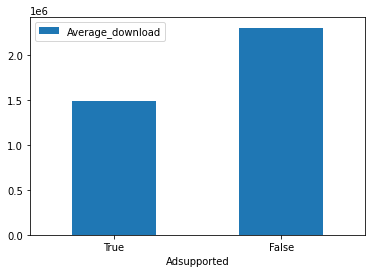

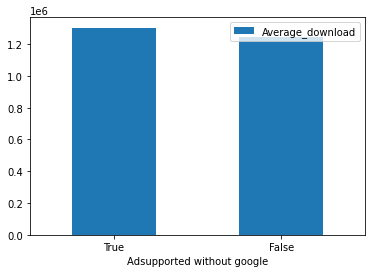

In [74]:
#데이터프레임 및 그래프
#평균 다운로드 수 의 변화
#평균 다운로드 수가 광고 있는 어플보다 없는 어플이 더 높지만 구글 기본 어플의 다운로드수를 제외하면 광고 유무에 따른 평균 다운로드수가 큰 차이가 없음을 알 수 있다. 이를 통해 광고유무가 사용자가 앱 다운로드를 선택하는 것에 큰 영향을 미치지 않음을 알 수 있다. 
adsupported_average_download = pd.DataFrame({'Adsupported':['True', 'False'],
                                             'Average_download':[1492648,2308279]})
adsupported_average_download.plot.bar(x='Adsupported', y='Average_download', rot=0)
adsupported_without_google_average_download = pd.DataFrame({'Adsupported without google':['True', 'False'],
                                             'Average_download':[1303157,1243938]})
adsupported_without_google_average_download.plot.bar(x='Adsupported without google', y='Average_download', rot=0)

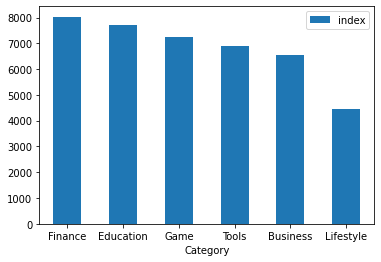

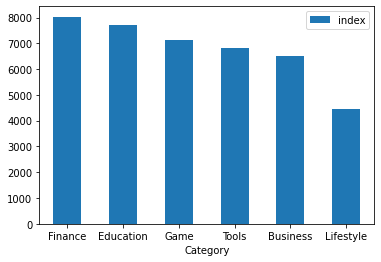

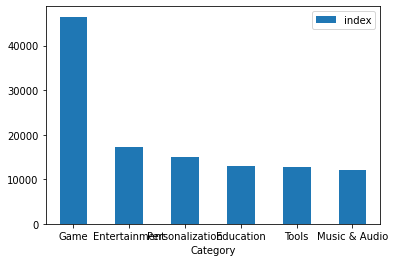

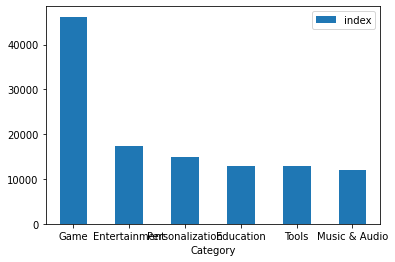

In [71]:
#구글 어플 유무에 따른 다운로드수 상위 카테고리 변화는 없다. (이 자료는 사용 안해도 괜찮을 것 같아요)
false_category.head(6).plot.bar(x='Category', y='index', rot=0)
false_without_google_category.head(6).plot.bar(x='Category', y='index', rot=0)
true_category.head(6).plot.bar(x='Category', y='index', rot=0)
true_without_google_catergory.head(6).plot.bar(x='Category', y='index', rot=0)